# <center> Réseau de neurones multicouches </center>

---

**Source :** Aurélien Vannieuwenhuyze, Intelligence artificielle vulgarisée, le Machine Learning et le Deep Learning par la pratique, ENI, Paris, 2019, p.317-326.
    
L'utilisation du XOR (ou exclusif) nécessite plusieurs couches.  

**Changement par rapport au réseau mono-couche :**
- Création des poids de la couche cachée
- Création du biais relié à la couche cachée 
- Prise en compte de la couche cachée dans la fonction d'erreur

---

## Initialisation des poids

Initialisation de façon aléatoire les poids dans l'intervalle [-1 et 1] et donner la valeur 0 pour les biais.

In [2]:
W11 = -0,165955990594852
W21 = 0.4406489868843162
W31 = -0.9997712503653102
W41 = -0.39533485473632046

#Couche cachée
W12 = 0.7064882183657739
W22 = -0.8153228104624044

#Biais
W51 = 0
W61 = 0
W32 = 0

## Chargement des données d'entrée

In [3]:
X1 = 0
X2 = 0
ATTENDU = 0

## Calcul de la préactivation du neurone de sortie

In [ ]:
# valeur du neurone H1

Pre_activation_Hl = (X1*W11 + X2*W31) + (1*W51)
H1= sigmoïde(Pre_activation_H1)
H1 = sigmoïde(O)
H1= 1/(1+EXP(O))
H1= 0.5

In [ ]:
# valeur du neurone H2

Pre_activation_H2 = (X1*W21 + X2*W41) + (1*W51)
H2 = sigmoïde(Pre_activation_H2)
H2 = sigmoïde(O)
H2 = 1/(1+EXP-0)
H2 = 0.5

In [ ]:
# pré-activation du neurone de sortie

Pre_activation = (H1*W12 + H2*W22) + (1*W31)
Pre_activation = -0,760905514

## Calcul de l'activation

In [ ]:
Y= sigmoïde(-0.760905514)
Y= 1/(1+EXP(-0.760905514))
y= 0.318449702

## Calcul de l'erreur

In [4]:
Erreur = 0 - 0,318449702
Erreur= -0.318449702

## Mise à jour des poids

Pour le poids W12 :

In [ ]:
Gradient -1 * erreur * Y * (1-Y) * H1
Gradient = 0.03455808
Valeur_Ajustement = Taux_apprentissage * Gradient
Valeur_Ajustement = 0.1 * Gradient
Valeur_Ajustement = 0.00345581
Nouveau W12 = W12 - Valeur_Ajustement
Nouveau W12 = -0.70994403

---

# Code avec Tensorflow 

## Importations 

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

## Transformation des valeurs en décimales

In [9]:
valeurs_entrees_X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
valeurs_a_predire_Y = [[0.], [1.], [1.], [0.]]

## Paramétrage du réseau de neurones

In [10]:
#Variable TensorFLow correspondant aux valeurs neurones d'entrée
tf_neurones_entrees_X = tf.placeholder(tf.float32, [None, 2])

#Variable TensorFlow correspondant au neurone de sortie (prédiction réelle)
tf_valeurs_reelles_Y = tf.placeholder(tf.float32, [None, 1])


#Nombre de neurones dans la couche cachée
nbr_neurones_couche_cachee = 2

### Poids

In [11]:
#Les premiers sont au nombres de 4 : 2 entrées (X1 et X2) et 2 poids par entrées
poids = tf.Variable(tf.random_normal([2, 2]), tf.float32)

#les poids de la couche cachée sont au nombre de 2 : 2 entrée (H1 et H2) et 1 poids par entrée
poids_couche_cachee = tf.Variable(tf.random_normal([2, 1]), tf.float32)

#Premier biais comporte 2 poids
biais = tf.Variable(tf.zeros([2]))

#Le second biais comporte 1 poids
biais_couche_cachee = tf.Variable(tf.zeros([1]))

### Calculs

In [12]:
#Calcul de l'activation de la première couche
#calcul de la somme pondérée (tf.matmul) à l'aide des données X1, X2, W11,W12,W31,W41 et du bais
#puis application de la fonction sigmoide (tf.sigmoid)
activation = tf.sigmoid(tf.matmul(tf_neurones_entrees_X, poids) + biais)

#Calcul de l'activation de la couche cachée
#calcul de la somme pondérée (tf.matmul) à l'aide des données H1, H2, W12,W21 et du bais
#puis application de la fonction sigmoide (tf.sigmoid)
activation_couche_cachee = tf.sigmoid(tf.matmul(activation, poids_couche_cachee) + biais_couche_cachee)

#Fonction d'erreur de moyenne quadratique MSE
fonction_erreur = tf.reduce_sum(tf.pow(tf_valeurs_reelles_Y-activation_couche_cachee,2))

#Descente de gradient avec un taux d'apprentissage fixé à 0.1
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(fonction_erreur)

### Finalisation du réseau de neurones

In [26]:
#Nombre d'epochs
epochs = 20000

#Initialisation des variable
init = tf.global_variables_initializer()

#Démarrage d'une session d'apprentissage
session = tf.Session()
session.run(init)

## Apprentissage

In [27]:
#Pour la réalisation du graphique pour la MSE
Graphique_MSE=[]


#Pour chaque epoch
for i in range(epochs):

   #Réalisation de l'apprentissage avec mise à jour des poids
   session.run(optimiseur, feed_dict = {tf_neurones_entrees_X: valeurs_entrees_X, tf_valeurs_reelles_Y:valeurs_a_predire_Y})

   #Calculer l'erreur
   MSE = session.run(fonction_erreur, feed_dict = {tf_neurones_entrees_X: valeurs_entrees_X, tf_valeurs_reelles_Y:valeurs_a_predire_Y})

   #Affichage des informations
   Graphique_MSE.append(MSE)
   print("EPOCH (" + str(i) + "/" + str(epochs) + ") -  MSE: "+ str(MSE))

EPOCH (0/20000) -  MSE: 1.0000715
EPOCH (1/20000) -  MSE: 1.000046
EPOCH (2/20000) -  MSE: 1.0000243
EPOCH (3/20000) -  MSE: 1.0000063
EPOCH (4/20000) -  MSE: 0.99999106
EPOCH (5/20000) -  MSE: 0.9999781
EPOCH (6/20000) -  MSE: 0.9999672
EPOCH (7/20000) -  MSE: 0.999958
EPOCH (8/20000) -  MSE: 0.99995005
EPOCH (9/20000) -  MSE: 0.99994326
EPOCH (10/20000) -  MSE: 0.9999374
EPOCH (11/20000) -  MSE: 0.99993247
EPOCH (12/20000) -  MSE: 0.999928
EPOCH (13/20000) -  MSE: 0.9999242
EPOCH (14/20000) -  MSE: 0.9999209
EPOCH (15/20000) -  MSE: 0.9999178
EPOCH (16/20000) -  MSE: 0.9999151
EPOCH (17/20000) -  MSE: 0.99991274
EPOCH (18/20000) -  MSE: 0.9999106
EPOCH (19/20000) -  MSE: 0.9999087
EPOCH (20/20000) -  MSE: 0.9999067
EPOCH (21/20000) -  MSE: 0.999905
EPOCH (22/20000) -  MSE: 0.9999033
EPOCH (23/20000) -  MSE: 0.9999017
EPOCH (24/20000) -  MSE: 0.9999003
EPOCH (25/20000) -  MSE: 0.999899
EPOCH (26/20000) -  MSE: 0.9998977
EPOCH (27/20000) -  MSE: 0.9998965
EPOCH (28/20000) -  MSE: 0.999

EPOCH (415/20000) -  MSE: 0.99933916
EPOCH (416/20000) -  MSE: 0.9993371
EPOCH (417/20000) -  MSE: 0.9993351
EPOCH (418/20000) -  MSE: 0.9993329
EPOCH (419/20000) -  MSE: 0.9993309
EPOCH (420/20000) -  MSE: 0.9993287
EPOCH (421/20000) -  MSE: 0.9993265
EPOCH (422/20000) -  MSE: 0.99932444
EPOCH (423/20000) -  MSE: 0.9993223
EPOCH (424/20000) -  MSE: 0.9993202
EPOCH (425/20000) -  MSE: 0.99931806
EPOCH (426/20000) -  MSE: 0.99931586
EPOCH (427/20000) -  MSE: 0.9993138
EPOCH (428/20000) -  MSE: 0.9993116
EPOCH (429/20000) -  MSE: 0.9993094
EPOCH (430/20000) -  MSE: 0.9993072
EPOCH (431/20000) -  MSE: 0.9993052
EPOCH (432/20000) -  MSE: 0.9993029
EPOCH (433/20000) -  MSE: 0.9993007
EPOCH (434/20000) -  MSE: 0.9992987
EPOCH (435/20000) -  MSE: 0.9992964
EPOCH (436/20000) -  MSE: 0.99929416
EPOCH (437/20000) -  MSE: 0.9992919
EPOCH (438/20000) -  MSE: 0.9992898
EPOCH (439/20000) -  MSE: 0.9992874
EPOCH (440/20000) -  MSE: 0.9992853
EPOCH (441/20000) -  MSE: 0.99928313
EPOCH (442/20000) -  M

EPOCH (830/20000) -  MSE: 0.9974899
EPOCH (831/20000) -  MSE: 0.99748105
EPOCH (832/20000) -  MSE: 0.99747205
EPOCH (833/20000) -  MSE: 0.9974631
EPOCH (834/20000) -  MSE: 0.9974539
EPOCH (835/20000) -  MSE: 0.9974448
EPOCH (836/20000) -  MSE: 0.99743575
EPOCH (837/20000) -  MSE: 0.9974266
EPOCH (838/20000) -  MSE: 0.9974173
EPOCH (839/20000) -  MSE: 0.99740815
EPOCH (840/20000) -  MSE: 0.9973988
EPOCH (841/20000) -  MSE: 0.9973895
EPOCH (842/20000) -  MSE: 0.99738026
EPOCH (843/20000) -  MSE: 0.99737084
EPOCH (844/20000) -  MSE: 0.9973613
EPOCH (845/20000) -  MSE: 0.9973518
EPOCH (846/20000) -  MSE: 0.9973422
EPOCH (847/20000) -  MSE: 0.99733275
EPOCH (848/20000) -  MSE: 0.99732316
EPOCH (849/20000) -  MSE: 0.99731344
EPOCH (850/20000) -  MSE: 0.99730384
EPOCH (851/20000) -  MSE: 0.9972941
EPOCH (852/20000) -  MSE: 0.9972843
EPOCH (853/20000) -  MSE: 0.9972744
EPOCH (854/20000) -  MSE: 0.99726456
EPOCH (855/20000) -  MSE: 0.9972546
EPOCH (856/20000) -  MSE: 0.9972447
EPOCH (857/20000)

EPOCH (1168/20000) -  MSE: 0.9902112
EPOCH (1169/20000) -  MSE: 0.99016726
EPOCH (1170/20000) -  MSE: 0.99012315
EPOCH (1171/20000) -  MSE: 0.99007887
EPOCH (1172/20000) -  MSE: 0.99003434
EPOCH (1173/20000) -  MSE: 0.9899896
EPOCH (1174/20000) -  MSE: 0.9899445
EPOCH (1175/20000) -  MSE: 0.9898993
EPOCH (1176/20000) -  MSE: 0.9898539
EPOCH (1177/20000) -  MSE: 0.98980814
EPOCH (1178/20000) -  MSE: 0.98976237
EPOCH (1179/20000) -  MSE: 0.9897163
EPOCH (1180/20000) -  MSE: 0.9896699
EPOCH (1181/20000) -  MSE: 0.98962337
EPOCH (1182/20000) -  MSE: 0.9895765
EPOCH (1183/20000) -  MSE: 0.9895296
EPOCH (1184/20000) -  MSE: 0.9894822
EPOCH (1185/20000) -  MSE: 0.98943484
EPOCH (1186/20000) -  MSE: 0.98938715
EPOCH (1187/20000) -  MSE: 0.9893392
EPOCH (1188/20000) -  MSE: 0.9892909
EPOCH (1189/20000) -  MSE: 0.98924255
EPOCH (1190/20000) -  MSE: 0.98919386
EPOCH (1191/20000) -  MSE: 0.989145
EPOCH (1192/20000) -  MSE: 0.98909575
EPOCH (1193/20000) -  MSE: 0.9890464
EPOCH (1194/20000) -  MSE: 

EPOCH (1529/20000) -  MSE: 0.95005226
EPOCH (1530/20000) -  MSE: 0.9498394
EPOCH (1531/20000) -  MSE: 0.9496258
EPOCH (1532/20000) -  MSE: 0.9494115
EPOCH (1533/20000) -  MSE: 0.9491964
EPOCH (1534/20000) -  MSE: 0.9489804
EPOCH (1535/20000) -  MSE: 0.9487637
EPOCH (1536/20000) -  MSE: 0.9485463
EPOCH (1537/20000) -  MSE: 0.948328
EPOCH (1538/20000) -  MSE: 0.94810915
EPOCH (1539/20000) -  MSE: 0.9478893
EPOCH (1540/20000) -  MSE: 0.9476688
EPOCH (1541/20000) -  MSE: 0.94744736
EPOCH (1542/20000) -  MSE: 0.94722533
EPOCH (1543/20000) -  MSE: 0.94700235
EPOCH (1544/20000) -  MSE: 0.9467787
EPOCH (1545/20000) -  MSE: 0.9465542
EPOCH (1546/20000) -  MSE: 0.9463288
EPOCH (1547/20000) -  MSE: 0.9461027
EPOCH (1548/20000) -  MSE: 0.9458759
EPOCH (1549/20000) -  MSE: 0.94564843
EPOCH (1550/20000) -  MSE: 0.94542
EPOCH (1551/20000) -  MSE: 0.9451907
EPOCH (1552/20000) -  MSE: 0.94496053
EPOCH (1553/20000) -  MSE: 0.9447298
EPOCH (1554/20000) -  MSE: 0.94449806
EPOCH (1555/20000) -  MSE: 0.9442

EPOCH (1900/20000) -  MSE: 0.81751454
EPOCH (1901/20000) -  MSE: 0.8170558
EPOCH (1902/20000) -  MSE: 0.8165971
EPOCH (1903/20000) -  MSE: 0.816138
EPOCH (1904/20000) -  MSE: 0.8156789
EPOCH (1905/20000) -  MSE: 0.81521964
EPOCH (1906/20000) -  MSE: 0.81476027
EPOCH (1907/20000) -  MSE: 0.8143008
EPOCH (1908/20000) -  MSE: 0.8138412
EPOCH (1909/20000) -  MSE: 0.81338143
EPOCH (1910/20000) -  MSE: 0.8129215
EPOCH (1911/20000) -  MSE: 0.8124615
EPOCH (1912/20000) -  MSE: 0.81200147
EPOCH (1913/20000) -  MSE: 0.81154114
EPOCH (1914/20000) -  MSE: 0.81108075
EPOCH (1915/20000) -  MSE: 0.81062037
EPOCH (1916/20000) -  MSE: 0.81015974
EPOCH (1917/20000) -  MSE: 0.80969924
EPOCH (1918/20000) -  MSE: 0.8092383
EPOCH (1919/20000) -  MSE: 0.8087775
EPOCH (1920/20000) -  MSE: 0.80831647
EPOCH (1921/20000) -  MSE: 0.80785537
EPOCH (1922/20000) -  MSE: 0.8073944
EPOCH (1923/20000) -  MSE: 0.80693316
EPOCH (1924/20000) -  MSE: 0.8064717
EPOCH (1925/20000) -  MSE: 0.80601037
EPOCH (1926/20000) -  MSE

EPOCH (2299/20000) -  MSE: 0.6066435
EPOCH (2300/20000) -  MSE: 0.60589665
EPOCH (2301/20000) -  MSE: 0.6051476
EPOCH (2302/20000) -  MSE: 0.60439664
EPOCH (2303/20000) -  MSE: 0.6036433
EPOCH (2304/20000) -  MSE: 0.602888
EPOCH (2305/20000) -  MSE: 0.6021306
EPOCH (2306/20000) -  MSE: 0.6013709
EPOCH (2307/20000) -  MSE: 0.60060906
EPOCH (2308/20000) -  MSE: 0.59984523
EPOCH (2309/20000) -  MSE: 0.59907913
EPOCH (2310/20000) -  MSE: 0.5983108
EPOCH (2311/20000) -  MSE: 0.5975404
EPOCH (2312/20000) -  MSE: 0.59676796
EPOCH (2313/20000) -  MSE: 0.59599316
EPOCH (2314/20000) -  MSE: 0.5952162
EPOCH (2315/20000) -  MSE: 0.594437
EPOCH (2316/20000) -  MSE: 0.5936558
EPOCH (2317/20000) -  MSE: 0.59287226
EPOCH (2318/20000) -  MSE: 0.59208643
EPOCH (2319/20000) -  MSE: 0.59129864
EPOCH (2320/20000) -  MSE: 0.5905086
EPOCH (2321/20000) -  MSE: 0.5897163
EPOCH (2322/20000) -  MSE: 0.58892196
EPOCH (2323/20000) -  MSE: 0.58812517
EPOCH (2324/20000) -  MSE: 0.5873263
EPOCH (2325/20000) -  MSE: 0

EPOCH (2699/20000) -  MSE: 0.23391932
EPOCH (2700/20000) -  MSE: 0.23321421
EPOCH (2701/20000) -  MSE: 0.23251164
EPOCH (2702/20000) -  MSE: 0.23181133
EPOCH (2703/20000) -  MSE: 0.23111355
EPOCH (2704/20000) -  MSE: 0.23041819
EPOCH (2705/20000) -  MSE: 0.22972515
EPOCH (2706/20000) -  MSE: 0.2290345
EPOCH (2707/20000) -  MSE: 0.22834635
EPOCH (2708/20000) -  MSE: 0.22766037
EPOCH (2709/20000) -  MSE: 0.22697698
EPOCH (2710/20000) -  MSE: 0.22629593
EPOCH (2711/20000) -  MSE: 0.22561726
EPOCH (2712/20000) -  MSE: 0.22494093
EPOCH (2713/20000) -  MSE: 0.22426702
EPOCH (2714/20000) -  MSE: 0.22359549
EPOCH (2715/20000) -  MSE: 0.22292632
EPOCH (2716/20000) -  MSE: 0.22225934
EPOCH (2717/20000) -  MSE: 0.22159484
EPOCH (2718/20000) -  MSE: 0.22093284
EPOCH (2719/20000) -  MSE: 0.22027299
EPOCH (2720/20000) -  MSE: 0.21961561
EPOCH (2721/20000) -  MSE: 0.21896042
EPOCH (2722/20000) -  MSE: 0.21830773
EPOCH (2723/20000) -  MSE: 0.21765724
EPOCH (2724/20000) -  MSE: 0.21700923
EPOCH (2725/2

EPOCH (3102/20000) -  MSE: 0.08577625
EPOCH (3103/20000) -  MSE: 0.08561146
EPOCH (3104/20000) -  MSE: 0.08544727
EPOCH (3105/20000) -  MSE: 0.085283585
EPOCH (3106/20000) -  MSE: 0.08512037
EPOCH (3107/20000) -  MSE: 0.084957674
EPOCH (3108/20000) -  MSE: 0.08479556
EPOCH (3109/20000) -  MSE: 0.08463385
EPOCH (3110/20000) -  MSE: 0.08447277
EPOCH (3111/20000) -  MSE: 0.084312126
EPOCH (3112/20000) -  MSE: 0.08415197
EPOCH (3113/20000) -  MSE: 0.08399238
EPOCH (3114/20000) -  MSE: 0.08383325
EPOCH (3115/20000) -  MSE: 0.08367461
EPOCH (3116/20000) -  MSE: 0.08351646
EPOCH (3117/20000) -  MSE: 0.08335885
EPOCH (3118/20000) -  MSE: 0.0832017
EPOCH (3119/20000) -  MSE: 0.083045065
EPOCH (3120/20000) -  MSE: 0.082888916
EPOCH (3121/20000) -  MSE: 0.08273327
EPOCH (3122/20000) -  MSE: 0.082578056
EPOCH (3123/20000) -  MSE: 0.08242336
EPOCH (3124/20000) -  MSE: 0.0822691
EPOCH (3125/20000) -  MSE: 0.082115404
EPOCH (3126/20000) -  MSE: 0.08196209
EPOCH (3127/20000) -  MSE: 0.08180931
EPOCH (

EPOCH (3500/20000) -  MSE: 0.046448015
EPOCH (3501/20000) -  MSE: 0.04639045
EPOCH (3502/20000) -  MSE: 0.046333075
EPOCH (3503/20000) -  MSE: 0.046275795
EPOCH (3504/20000) -  MSE: 0.04621863
EPOCH (3505/20000) -  MSE: 0.046161592
EPOCH (3506/20000) -  MSE: 0.0461047
EPOCH (3507/20000) -  MSE: 0.046047922
EPOCH (3508/20000) -  MSE: 0.04599125
EPOCH (3509/20000) -  MSE: 0.04593471
EPOCH (3510/20000) -  MSE: 0.04587831
EPOCH (3511/20000) -  MSE: 0.045822024
EPOCH (3512/20000) -  MSE: 0.045765836
EPOCH (3513/20000) -  MSE: 0.045709793
EPOCH (3514/20000) -  MSE: 0.04565387
EPOCH (3515/20000) -  MSE: 0.045598086
EPOCH (3516/20000) -  MSE: 0.04554239
EPOCH (3517/20000) -  MSE: 0.04548683
EPOCH (3518/20000) -  MSE: 0.045431383
EPOCH (3519/20000) -  MSE: 0.045376074
EPOCH (3520/20000) -  MSE: 0.045320842
EPOCH (3521/20000) -  MSE: 0.045265783
EPOCH (3522/20000) -  MSE: 0.045210816
EPOCH (3523/20000) -  MSE: 0.045155965
EPOCH (3524/20000) -  MSE: 0.04510121
EPOCH (3525/20000) -  MSE: 0.0450466

EPOCH (3784/20000) -  MSE: 0.034031853
EPOCH (3785/20000) -  MSE: 0.033998873
EPOCH (3786/20000) -  MSE: 0.033965953
EPOCH (3787/20000) -  MSE: 0.033933047
EPOCH (3788/20000) -  MSE: 0.033900242
EPOCH (3789/20000) -  MSE: 0.03386747
EPOCH (3790/20000) -  MSE: 0.033834785
EPOCH (3791/20000) -  MSE: 0.03380213
EPOCH (3792/20000) -  MSE: 0.033769563
EPOCH (3793/20000) -  MSE: 0.033737015
EPOCH (3794/20000) -  MSE: 0.033704545
EPOCH (3795/20000) -  MSE: 0.033672124
EPOCH (3796/20000) -  MSE: 0.033639774
EPOCH (3797/20000) -  MSE: 0.033607457
EPOCH (3798/20000) -  MSE: 0.033575222
EPOCH (3799/20000) -  MSE: 0.033543035
EPOCH (3800/20000) -  MSE: 0.03351091
EPOCH (3801/20000) -  MSE: 0.03347881
EPOCH (3802/20000) -  MSE: 0.03344678
EPOCH (3803/20000) -  MSE: 0.033414803
EPOCH (3804/20000) -  MSE: 0.033382878
EPOCH (3805/20000) -  MSE: 0.03335104
EPOCH (3806/20000) -  MSE: 0.033319227
EPOCH (3807/20000) -  MSE: 0.03328748
EPOCH (3808/20000) -  MSE: 0.033255782
EPOCH (3809/20000) -  MSE: 0.033

EPOCH (4156/20000) -  MSE: 0.024805546
EPOCH (4157/20000) -  MSE: 0.024787009
EPOCH (4158/20000) -  MSE: 0.024768503
EPOCH (4159/20000) -  MSE: 0.024750015
EPOCH (4160/20000) -  MSE: 0.024731547
EPOCH (4161/20000) -  MSE: 0.024713112
EPOCH (4162/20000) -  MSE: 0.024694704
EPOCH (4163/20000) -  MSE: 0.024676315
EPOCH (4164/20000) -  MSE: 0.024657963
EPOCH (4165/20000) -  MSE: 0.024639608
EPOCH (4166/20000) -  MSE: 0.024621302
EPOCH (4167/20000) -  MSE: 0.02460304
EPOCH (4168/20000) -  MSE: 0.024584776
EPOCH (4169/20000) -  MSE: 0.024566535
EPOCH (4170/20000) -  MSE: 0.024548322
EPOCH (4171/20000) -  MSE: 0.024530135
EPOCH (4172/20000) -  MSE: 0.024511967
EPOCH (4173/20000) -  MSE: 0.024493825
EPOCH (4174/20000) -  MSE: 0.024475727
EPOCH (4175/20000) -  MSE: 0.024457645
EPOCH (4176/20000) -  MSE: 0.024439577
EPOCH (4177/20000) -  MSE: 0.024421528
EPOCH (4178/20000) -  MSE: 0.024403516
EPOCH (4179/20000) -  MSE: 0.024385532
EPOCH (4180/20000) -  MSE: 0.02436755
EPOCH (4181/20000) -  MSE: 

EPOCH (4500/20000) -  MSE: 0.019653736
EPOCH (4501/20000) -  MSE: 0.019641668
EPOCH (4502/20000) -  MSE: 0.019629624
EPOCH (4503/20000) -  MSE: 0.019617584
EPOCH (4504/20000) -  MSE: 0.019605586
EPOCH (4505/20000) -  MSE: 0.01959357
EPOCH (4506/20000) -  MSE: 0.01958159
EPOCH (4507/20000) -  MSE: 0.019569594
EPOCH (4508/20000) -  MSE: 0.019557633
EPOCH (4509/20000) -  MSE: 0.019545682
EPOCH (4510/20000) -  MSE: 0.019533755
EPOCH (4511/20000) -  MSE: 0.019521827
EPOCH (4512/20000) -  MSE: 0.019509904
EPOCH (4513/20000) -  MSE: 0.019498024
EPOCH (4514/20000) -  MSE: 0.019486139
EPOCH (4515/20000) -  MSE: 0.019474266
EPOCH (4516/20000) -  MSE: 0.019462423
EPOCH (4517/20000) -  MSE: 0.019450564
EPOCH (4518/20000) -  MSE: 0.019438738
EPOCH (4519/20000) -  MSE: 0.019426929
EPOCH (4520/20000) -  MSE: 0.01941513
EPOCH (4521/20000) -  MSE: 0.01940334
EPOCH (4522/20000) -  MSE: 0.019391555
EPOCH (4523/20000) -  MSE: 0.019379787
EPOCH (4524/20000) -  MSE: 0.019368036
EPOCH (4525/20000) -  MSE: 0.

EPOCH (4854/20000) -  MSE: 0.016103458
EPOCH (4855/20000) -  MSE: 0.016095143
EPOCH (4856/20000) -  MSE: 0.016086817
EPOCH (4857/20000) -  MSE: 0.016078498
EPOCH (4858/20000) -  MSE: 0.016070234
EPOCH (4859/20000) -  MSE: 0.016061936
EPOCH (4860/20000) -  MSE: 0.01605364
EPOCH (4861/20000) -  MSE: 0.016045384
EPOCH (4862/20000) -  MSE: 0.016037107
EPOCH (4863/20000) -  MSE: 0.016028857
EPOCH (4864/20000) -  MSE: 0.016020603
EPOCH (4865/20000) -  MSE: 0.016012348
EPOCH (4866/20000) -  MSE: 0.016004127
EPOCH (4867/20000) -  MSE: 0.015995912
EPOCH (4868/20000) -  MSE: 0.015987698
EPOCH (4869/20000) -  MSE: 0.015979478
EPOCH (4870/20000) -  MSE: 0.01597128
EPOCH (4871/20000) -  MSE: 0.015963085
EPOCH (4872/20000) -  MSE: 0.01595491
EPOCH (4873/20000) -  MSE: 0.01594672
EPOCH (4874/20000) -  MSE: 0.015938569
EPOCH (4875/20000) -  MSE: 0.0159304
EPOCH (4876/20000) -  MSE: 0.015922256
EPOCH (4877/20000) -  MSE: 0.015914094
EPOCH (4878/20000) -  MSE: 0.015905965
EPOCH (4879/20000) -  MSE: 0.01

EPOCH (5077/20000) -  MSE: 0.014428244
EPOCH (5078/20000) -  MSE: 0.014421472
EPOCH (5079/20000) -  MSE: 0.014414703
EPOCH (5080/20000) -  MSE: 0.01440794
EPOCH (5081/20000) -  MSE: 0.014401193
EPOCH (5082/20000) -  MSE: 0.014394442
EPOCH (5083/20000) -  MSE: 0.014387704
EPOCH (5084/20000) -  MSE: 0.01438096
EPOCH (5085/20000) -  MSE: 0.014374235
EPOCH (5086/20000) -  MSE: 0.014367497
EPOCH (5087/20000) -  MSE: 0.01436078
EPOCH (5088/20000) -  MSE: 0.014354065
EPOCH (5089/20000) -  MSE: 0.014347358
EPOCH (5090/20000) -  MSE: 0.01434066
EPOCH (5091/20000) -  MSE: 0.014333965
EPOCH (5092/20000) -  MSE: 0.014327272
EPOCH (5093/20000) -  MSE: 0.014320576
EPOCH (5094/20000) -  MSE: 0.0143139195
EPOCH (5095/20000) -  MSE: 0.014307238
EPOCH (5096/20000) -  MSE: 0.014300565
EPOCH (5097/20000) -  MSE: 0.014293911
EPOCH (5098/20000) -  MSE: 0.014287249
EPOCH (5099/20000) -  MSE: 0.014280601
EPOCH (5100/20000) -  MSE: 0.014273947
EPOCH (5101/20000) -  MSE: 0.01426732
EPOCH (5102/20000) -  MSE: 0.

EPOCH (5292/20000) -  MSE: 0.013097748
EPOCH (5293/20000) -  MSE: 0.013092102
EPOCH (5294/20000) -  MSE: 0.013086457
EPOCH (5295/20000) -  MSE: 0.013080826
EPOCH (5296/20000) -  MSE: 0.013075192
EPOCH (5297/20000) -  MSE: 0.013069555
EPOCH (5298/20000) -  MSE: 0.013063934
EPOCH (5299/20000) -  MSE: 0.013058313
EPOCH (5300/20000) -  MSE: 0.013052698
EPOCH (5301/20000) -  MSE: 0.013047086
EPOCH (5302/20000) -  MSE: 0.013041482
EPOCH (5303/20000) -  MSE: 0.0130358795
EPOCH (5304/20000) -  MSE: 0.013030278
EPOCH (5305/20000) -  MSE: 0.013024687
EPOCH (5306/20000) -  MSE: 0.013019098
EPOCH (5307/20000) -  MSE: 0.013013518
EPOCH (5308/20000) -  MSE: 0.013007938
EPOCH (5309/20000) -  MSE: 0.013002364
EPOCH (5310/20000) -  MSE: 0.012996787
EPOCH (5311/20000) -  MSE: 0.012991224
EPOCH (5312/20000) -  MSE: 0.012985664
EPOCH (5313/20000) -  MSE: 0.0129801035
EPOCH (5314/20000) -  MSE: 0.012974556
EPOCH (5315/20000) -  MSE: 0.012969008
EPOCH (5316/20000) -  MSE: 0.012963466
EPOCH (5317/20000) -  M

EPOCH (5512/20000) -  MSE: 0.011956951
EPOCH (5513/20000) -  MSE: 0.011952202
EPOCH (5514/20000) -  MSE: 0.011947449
EPOCH (5515/20000) -  MSE: 0.011942702
EPOCH (5516/20000) -  MSE: 0.011937944
EPOCH (5517/20000) -  MSE: 0.011933209
EPOCH (5518/20000) -  MSE: 0.011928478
EPOCH (5519/20000) -  MSE: 0.011923742
EPOCH (5520/20000) -  MSE: 0.011919005
EPOCH (5521/20000) -  MSE: 0.011914272
EPOCH (5522/20000) -  MSE: 0.011909555
EPOCH (5523/20000) -  MSE: 0.01190483
EPOCH (5524/20000) -  MSE: 0.011900106
EPOCH (5525/20000) -  MSE: 0.011895398
EPOCH (5526/20000) -  MSE: 0.011890687
EPOCH (5527/20000) -  MSE: 0.01188598
EPOCH (5528/20000) -  MSE: 0.011881281
EPOCH (5529/20000) -  MSE: 0.011876583
EPOCH (5530/20000) -  MSE: 0.011871882
EPOCH (5531/20000) -  MSE: 0.011867192
EPOCH (5532/20000) -  MSE: 0.011862502
EPOCH (5533/20000) -  MSE: 0.011857813
EPOCH (5534/20000) -  MSE: 0.011853132
EPOCH (5535/20000) -  MSE: 0.011848459
EPOCH (5536/20000) -  MSE: 0.011843778
EPOCH (5537/20000) -  MSE: 

EPOCH (5928/20000) -  MSE: 0.010246016
EPOCH (5929/20000) -  MSE: 0.010242464
EPOCH (5930/20000) -  MSE: 0.010238906
EPOCH (5931/20000) -  MSE: 0.010235356
EPOCH (5932/20000) -  MSE: 0.010231818
EPOCH (5933/20000) -  MSE: 0.010228274
EPOCH (5934/20000) -  MSE: 0.010224739
EPOCH (5935/20000) -  MSE: 0.010221204
EPOCH (5936/20000) -  MSE: 0.010217662
EPOCH (5937/20000) -  MSE: 0.010214131
EPOCH (5938/20000) -  MSE: 0.0102106
EPOCH (5939/20000) -  MSE: 0.010207073
EPOCH (5940/20000) -  MSE: 0.0102035375
EPOCH (5941/20000) -  MSE: 0.010200014
EPOCH (5942/20000) -  MSE: 0.010196489
EPOCH (5943/20000) -  MSE: 0.0101929745
EPOCH (5944/20000) -  MSE: 0.010189461
EPOCH (5945/20000) -  MSE: 0.010185948
EPOCH (5946/20000) -  MSE: 0.01018243
EPOCH (5947/20000) -  MSE: 0.010178925
EPOCH (5948/20000) -  MSE: 0.010175416
EPOCH (5949/20000) -  MSE: 0.010171908
EPOCH (5950/20000) -  MSE: 0.010168409
EPOCH (5951/20000) -  MSE: 0.0101649035
EPOCH (5952/20000) -  MSE: 0.010161409
EPOCH (5953/20000) -  MSE

EPOCH (6322/20000) -  MSE: 0.00900706
EPOCH (6323/20000) -  MSE: 0.009004286
EPOCH (6324/20000) -  MSE: 0.0090015065
EPOCH (6325/20000) -  MSE: 0.008998726
EPOCH (6326/20000) -  MSE: 0.008995945
EPOCH (6327/20000) -  MSE: 0.008993178
EPOCH (6328/20000) -  MSE: 0.008990401
EPOCH (6329/20000) -  MSE: 0.008987625
EPOCH (6330/20000) -  MSE: 0.008984862
EPOCH (6331/20000) -  MSE: 0.008982093
EPOCH (6332/20000) -  MSE: 0.0089793205
EPOCH (6333/20000) -  MSE: 0.008976562
EPOCH (6334/20000) -  MSE: 0.008973792
EPOCH (6335/20000) -  MSE: 0.008971034
EPOCH (6336/20000) -  MSE: 0.00896828
EPOCH (6337/20000) -  MSE: 0.008965519
EPOCH (6338/20000) -  MSE: 0.008962763
EPOCH (6339/20000) -  MSE: 0.008960008
EPOCH (6340/20000) -  MSE: 0.00895725
EPOCH (6341/20000) -  MSE: 0.008954499
EPOCH (6342/20000) -  MSE: 0.00895175
EPOCH (6343/20000) -  MSE: 0.008948997
EPOCH (6344/20000) -  MSE: 0.008946258
EPOCH (6345/20000) -  MSE: 0.0089435065
EPOCH (6346/20000) -  MSE: 0.008940768
EPOCH (6347/20000) -  MSE:

EPOCH (6699/20000) -  MSE: 0.008063052
EPOCH (6700/20000) -  MSE: 0.008060804
EPOCH (6701/20000) -  MSE: 0.008058549
EPOCH (6702/20000) -  MSE: 0.008056301
EPOCH (6703/20000) -  MSE: 0.0080540525
EPOCH (6704/20000) -  MSE: 0.008051807
EPOCH (6705/20000) -  MSE: 0.008049559
EPOCH (6706/20000) -  MSE: 0.008047313
EPOCH (6707/20000) -  MSE: 0.008045069
EPOCH (6708/20000) -  MSE: 0.0080428235
EPOCH (6709/20000) -  MSE: 0.008040581
EPOCH (6710/20000) -  MSE: 0.008038338
EPOCH (6711/20000) -  MSE: 0.008036096
EPOCH (6712/20000) -  MSE: 0.008033856
EPOCH (6713/20000) -  MSE: 0.008031629
EPOCH (6714/20000) -  MSE: 0.008029388
EPOCH (6715/20000) -  MSE: 0.008027155
EPOCH (6716/20000) -  MSE: 0.008024924
EPOCH (6717/20000) -  MSE: 0.00802269
EPOCH (6718/20000) -  MSE: 0.008020456
EPOCH (6719/20000) -  MSE: 0.008018229
EPOCH (6720/20000) -  MSE: 0.008016003
EPOCH (6721/20000) -  MSE: 0.008013777
EPOCH (6722/20000) -  MSE: 0.008011544
EPOCH (6723/20000) -  MSE: 0.008009313
EPOCH (6724/20000) -  MS

EPOCH (7061/20000) -  MSE: 0.0073192576
EPOCH (7062/20000) -  MSE: 0.007317379
EPOCH (7063/20000) -  MSE: 0.0073155137
EPOCH (7064/20000) -  MSE: 0.007313636
EPOCH (7065/20000) -  MSE: 0.007311771
EPOCH (7066/20000) -  MSE: 0.0073099025
EPOCH (7067/20000) -  MSE: 0.007308035
EPOCH (7068/20000) -  MSE: 0.0073061637
EPOCH (7069/20000) -  MSE: 0.0073042996
EPOCH (7070/20000) -  MSE: 0.007302437
EPOCH (7071/20000) -  MSE: 0.007300572
EPOCH (7072/20000) -  MSE: 0.0072987014
EPOCH (7073/20000) -  MSE: 0.007296841
EPOCH (7074/20000) -  MSE: 0.0072949845
EPOCH (7075/20000) -  MSE: 0.0072931233
EPOCH (7076/20000) -  MSE: 0.007291263
EPOCH (7077/20000) -  MSE: 0.0072893957
EPOCH (7078/20000) -  MSE: 0.0072875377
EPOCH (7079/20000) -  MSE: 0.0072856825
EPOCH (7080/20000) -  MSE: 0.007283822
EPOCH (7081/20000) -  MSE: 0.007281966
EPOCH (7082/20000) -  MSE: 0.0072801188
EPOCH (7083/20000) -  MSE: 0.007278264
EPOCH (7084/20000) -  MSE: 0.0072764084
EPOCH (7085/20000) -  MSE: 0.007274554
EPOCH (7086/

EPOCH (7401/20000) -  MSE: 0.006731296
EPOCH (7402/20000) -  MSE: 0.0067296973
EPOCH (7403/20000) -  MSE: 0.0067281057
EPOCH (7404/20000) -  MSE: 0.0067265118
EPOCH (7405/20000) -  MSE: 0.006724921
EPOCH (7406/20000) -  MSE: 0.006723326
EPOCH (7407/20000) -  MSE: 0.0067217317
EPOCH (7408/20000) -  MSE: 0.006720146
EPOCH (7409/20000) -  MSE: 0.006718549
EPOCH (7410/20000) -  MSE: 0.0067169624
EPOCH (7411/20000) -  MSE: 0.0067153694
EPOCH (7412/20000) -  MSE: 0.0067137815
EPOCH (7413/20000) -  MSE: 0.006712202
EPOCH (7414/20000) -  MSE: 0.0067106104
EPOCH (7415/20000) -  MSE: 0.0067090243
EPOCH (7416/20000) -  MSE: 0.006707441
EPOCH (7417/20000) -  MSE: 0.006705853
EPOCH (7418/20000) -  MSE: 0.0067042657
EPOCH (7419/20000) -  MSE: 0.006702685
EPOCH (7420/20000) -  MSE: 0.0067010983
EPOCH (7421/20000) -  MSE: 0.0066995155
EPOCH (7422/20000) -  MSE: 0.006697934
EPOCH (7423/20000) -  MSE: 0.006696361
EPOCH (7424/20000) -  MSE: 0.006694771
EPOCH (7425/20000) -  MSE: 0.0066931928
EPOCH (7426/

EPOCH (7743/20000) -  MSE: 0.006224785
EPOCH (7744/20000) -  MSE: 0.0062234094
EPOCH (7745/20000) -  MSE: 0.006222034
EPOCH (7746/20000) -  MSE: 0.006220661
EPOCH (7747/20000) -  MSE: 0.006219293
EPOCH (7748/20000) -  MSE: 0.0062179137
EPOCH (7749/20000) -  MSE: 0.0062165475
EPOCH (7750/20000) -  MSE: 0.006215173
EPOCH (7751/20000) -  MSE: 0.006213801
EPOCH (7752/20000) -  MSE: 0.006212432
EPOCH (7753/20000) -  MSE: 0.006211063
EPOCH (7754/20000) -  MSE: 0.006209691
EPOCH (7755/20000) -  MSE: 0.006208324
EPOCH (7756/20000) -  MSE: 0.0062069586
EPOCH (7757/20000) -  MSE: 0.006205595
EPOCH (7758/20000) -  MSE: 0.0062042275
EPOCH (7759/20000) -  MSE: 0.0062028673
EPOCH (7760/20000) -  MSE: 0.006201501
EPOCH (7761/20000) -  MSE: 0.006200142
EPOCH (7762/20000) -  MSE: 0.006198776
EPOCH (7763/20000) -  MSE: 0.0061974144
EPOCH (7764/20000) -  MSE: 0.006196048
EPOCH (7765/20000) -  MSE: 0.0061946874
EPOCH (7766/20000) -  MSE: 0.0061933324
EPOCH (7767/20000) -  MSE: 0.006191972
EPOCH (7768/2000

EPOCH (8098/20000) -  MSE: 0.0057711075
EPOCH (8099/20000) -  MSE: 0.005769917
EPOCH (8100/20000) -  MSE: 0.0057687243
EPOCH (8101/20000) -  MSE: 0.005767536
EPOCH (8102/20000) -  MSE: 0.0057663517
EPOCH (8103/20000) -  MSE: 0.0057651643
EPOCH (8104/20000) -  MSE: 0.0057639778
EPOCH (8105/20000) -  MSE: 0.005762793
EPOCH (8106/20000) -  MSE: 0.0057616076
EPOCH (8107/20000) -  MSE: 0.0057604266
EPOCH (8108/20000) -  MSE: 0.0057592387
EPOCH (8109/20000) -  MSE: 0.0057580536
EPOCH (8110/20000) -  MSE: 0.005756871
EPOCH (8111/20000) -  MSE: 0.005755687
EPOCH (8112/20000) -  MSE: 0.0057545057
EPOCH (8113/20000) -  MSE: 0.005753331
EPOCH (8114/20000) -  MSE: 0.0057521435
EPOCH (8115/20000) -  MSE: 0.0057509653
EPOCH (8116/20000) -  MSE: 0.005749785
EPOCH (8117/20000) -  MSE: 0.005748602
EPOCH (8118/20000) -  MSE: 0.0057474235
EPOCH (8119/20000) -  MSE: 0.005746248
EPOCH (8120/20000) -  MSE: 0.0057450687
EPOCH (8121/20000) -  MSE: 0.005743891
EPOCH (8122/20000) -  MSE: 0.0057427166
EPOCH (812

EPOCH (8500/20000) -  MSE: 0.0053285575
EPOCH (8501/20000) -  MSE: 0.005327543
EPOCH (8502/20000) -  MSE: 0.0053265207
EPOCH (8503/20000) -  MSE: 0.005325502
EPOCH (8504/20000) -  MSE: 0.00532448
EPOCH (8505/20000) -  MSE: 0.005323463
EPOCH (8506/20000) -  MSE: 0.0053224456
EPOCH (8507/20000) -  MSE: 0.0053214245
EPOCH (8508/20000) -  MSE: 0.0053204084
EPOCH (8509/20000) -  MSE: 0.005319395
EPOCH (8510/20000) -  MSE: 0.005318381
EPOCH (8511/20000) -  MSE: 0.0053173653
EPOCH (8512/20000) -  MSE: 0.005316345
EPOCH (8513/20000) -  MSE: 0.0053153317
EPOCH (8514/20000) -  MSE: 0.0053143203
EPOCH (8515/20000) -  MSE: 0.0053133066
EPOCH (8516/20000) -  MSE: 0.005312294
EPOCH (8517/20000) -  MSE: 0.005311284
EPOCH (8518/20000) -  MSE: 0.0053102733
EPOCH (8519/20000) -  MSE: 0.005309255
EPOCH (8520/20000) -  MSE: 0.0053082453
EPOCH (8521/20000) -  MSE: 0.005307235
EPOCH (8522/20000) -  MSE: 0.0053062243
EPOCH (8523/20000) -  MSE: 0.005305212
EPOCH (8524/20000) -  MSE: 0.005304203
EPOCH (8525/20

EPOCH (8883/20000) -  MSE: 0.0049637808
EPOCH (8884/20000) -  MSE: 0.0049628923
EPOCH (8885/20000) -  MSE: 0.0049619996
EPOCH (8886/20000) -  MSE: 0.0049611144
EPOCH (8887/20000) -  MSE: 0.004960228
EPOCH (8888/20000) -  MSE: 0.004959339
EPOCH (8889/20000) -  MSE: 0.0049584527
EPOCH (8890/20000) -  MSE: 0.0049575604
EPOCH (8891/20000) -  MSE: 0.004956675
EPOCH (8892/20000) -  MSE: 0.004955789
EPOCH (8893/20000) -  MSE: 0.0049548987
EPOCH (8894/20000) -  MSE: 0.0049540135
EPOCH (8895/20000) -  MSE: 0.0049531274
EPOCH (8896/20000) -  MSE: 0.0049522445
EPOCH (8897/20000) -  MSE: 0.004951357
EPOCH (8898/20000) -  MSE: 0.0049504717
EPOCH (8899/20000) -  MSE: 0.004949586
EPOCH (8900/20000) -  MSE: 0.0049487026
EPOCH (8901/20000) -  MSE: 0.0049478197
EPOCH (8902/20000) -  MSE: 0.004946936
EPOCH (8903/20000) -  MSE: 0.0049460456
EPOCH (8904/20000) -  MSE: 0.0049451618
EPOCH (8905/20000) -  MSE: 0.004944275
EPOCH (8906/20000) -  MSE: 0.00494339
EPOCH (8907/20000) -  MSE: 0.0049425103
EPOCH (890

EPOCH (9290/20000) -  MSE: 0.0046254774
EPOCH (9291/20000) -  MSE: 0.0046247058
EPOCH (9292/20000) -  MSE: 0.0046239323
EPOCH (9293/20000) -  MSE: 0.0046231565
EPOCH (9294/20000) -  MSE: 0.0046223784
EPOCH (9295/20000) -  MSE: 0.0046216054
EPOCH (9296/20000) -  MSE: 0.00462083
EPOCH (9297/20000) -  MSE: 0.004620053
EPOCH (9298/20000) -  MSE: 0.0046192817
EPOCH (9299/20000) -  MSE: 0.0046185004
EPOCH (9300/20000) -  MSE: 0.0046177288
EPOCH (9301/20000) -  MSE: 0.0046169553
EPOCH (9302/20000) -  MSE: 0.0046161804
EPOCH (9303/20000) -  MSE: 0.0046154046
EPOCH (9304/20000) -  MSE: 0.0046146344
EPOCH (9305/20000) -  MSE: 0.004613865
EPOCH (9306/20000) -  MSE: 0.0046130912
EPOCH (9307/20000) -  MSE: 0.004612319
EPOCH (9308/20000) -  MSE: 0.004611546
EPOCH (9309/20000) -  MSE: 0.0046107746
EPOCH (9310/20000) -  MSE: 0.004610001
EPOCH (9311/20000) -  MSE: 0.00460923
EPOCH (9312/20000) -  MSE: 0.0046084616
EPOCH (9313/20000) -  MSE: 0.0046076896
EPOCH (9314/20000) -  MSE: 0.0046069184
EPOCH (93

EPOCH (9648/20000) -  MSE: 0.0043627108
EPOCH (9649/20000) -  MSE: 0.004362016
EPOCH (9650/20000) -  MSE: 0.004361321
EPOCH (9651/20000) -  MSE: 0.00436063
EPOCH (9652/20000) -  MSE: 0.004359937
EPOCH (9653/20000) -  MSE: 0.004359241
EPOCH (9654/20000) -  MSE: 0.0043585487
EPOCH (9655/20000) -  MSE: 0.004357855
EPOCH (9656/20000) -  MSE: 0.004357162
EPOCH (9657/20000) -  MSE: 0.0043564728
EPOCH (9658/20000) -  MSE: 0.0043557766
EPOCH (9659/20000) -  MSE: 0.004355086
EPOCH (9660/20000) -  MSE: 0.0043543945
EPOCH (9661/20000) -  MSE: 0.004353705
EPOCH (9662/20000) -  MSE: 0.004353012
EPOCH (9663/20000) -  MSE: 0.0043523237
EPOCH (9664/20000) -  MSE: 0.004351628
EPOCH (9665/20000) -  MSE: 0.004350938
EPOCH (9666/20000) -  MSE: 0.004350253
EPOCH (9667/20000) -  MSE: 0.0043495568
EPOCH (9668/20000) -  MSE: 0.0043488713
EPOCH (9669/20000) -  MSE: 0.0043481765
EPOCH (9670/20000) -  MSE: 0.004347491
EPOCH (9671/20000) -  MSE: 0.0043468056
EPOCH (9672/20000) -  MSE: 0.0043461113
EPOCH (9673/200

EPOCH (9986/20000) -  MSE: 0.0041397866
EPOCH (9987/20000) -  MSE: 0.0041391617
EPOCH (9988/20000) -  MSE: 0.004138533
EPOCH (9989/20000) -  MSE: 0.0041379062
EPOCH (9990/20000) -  MSE: 0.004137287
EPOCH (9991/20000) -  MSE: 0.0041366555
EPOCH (9992/20000) -  MSE: 0.004136023
EPOCH (9993/20000) -  MSE: 0.004135398
EPOCH (9994/20000) -  MSE: 0.004134776
EPOCH (9995/20000) -  MSE: 0.0041341446
EPOCH (9996/20000) -  MSE: 0.0041335216
EPOCH (9997/20000) -  MSE: 0.004132905
EPOCH (9998/20000) -  MSE: 0.004132268
EPOCH (9999/20000) -  MSE: 0.004131644
EPOCH (10000/20000) -  MSE: 0.0041310294
EPOCH (10001/20000) -  MSE: 0.004130394
EPOCH (10002/20000) -  MSE: 0.004129763
EPOCH (10003/20000) -  MSE: 0.00412915
EPOCH (10004/20000) -  MSE: 0.0041285213
EPOCH (10005/20000) -  MSE: 0.0041278945
EPOCH (10006/20000) -  MSE: 0.0041272775
EPOCH (10007/20000) -  MSE: 0.0041266615
EPOCH (10008/20000) -  MSE: 0.0041260384
EPOCH (10009/20000) -  MSE: 0.0041254032
EPOCH (10010/20000) -  MSE: 0.004124782
EP

EPOCH (10298/20000) -  MSE: 0.003952695
EPOCH (10299/20000) -  MSE: 0.003952123
EPOCH (10300/20000) -  MSE: 0.0039515495
EPOCH (10301/20000) -  MSE: 0.0039509814
EPOCH (10302/20000) -  MSE: 0.0039504045
EPOCH (10303/20000) -  MSE: 0.003949834
EPOCH (10304/20000) -  MSE: 0.0039492594
EPOCH (10305/20000) -  MSE: 0.003948689
EPOCH (10306/20000) -  MSE: 0.0039481176
EPOCH (10307/20000) -  MSE: 0.0039475434
EPOCH (10308/20000) -  MSE: 0.0039469674
EPOCH (10309/20000) -  MSE: 0.003946395
EPOCH (10310/20000) -  MSE: 0.0039458256
EPOCH (10311/20000) -  MSE: 0.003945251
EPOCH (10312/20000) -  MSE: 0.003944677
EPOCH (10313/20000) -  MSE: 0.00394411
EPOCH (10314/20000) -  MSE: 0.0039435388
EPOCH (10315/20000) -  MSE: 0.0039429646
EPOCH (10316/20000) -  MSE: 0.003942395
EPOCH (10317/20000) -  MSE: 0.003941823
EPOCH (10318/20000) -  MSE: 0.0039412603
EPOCH (10319/20000) -  MSE: 0.003940687
EPOCH (10320/20000) -  MSE: 0.0039401166
EPOCH (10321/20000) -  MSE: 0.003939544
EPOCH (10322/20000) -  MSE: 0

EPOCH (10503/20000) -  MSE: 0.0038384264
EPOCH (10504/20000) -  MSE: 0.0038378895
EPOCH (10505/20000) -  MSE: 0.0038373454
EPOCH (10506/20000) -  MSE: 0.003836806
EPOCH (10507/20000) -  MSE: 0.0038362625
EPOCH (10508/20000) -  MSE: 0.0038357272
EPOCH (10509/20000) -  MSE: 0.0038351815
EPOCH (10510/20000) -  MSE: 0.0038346392
EPOCH (10511/20000) -  MSE: 0.0038340956
EPOCH (10512/20000) -  MSE: 0.0038335565
EPOCH (10513/20000) -  MSE: 0.0038330166
EPOCH (10514/20000) -  MSE: 0.0038324776
EPOCH (10515/20000) -  MSE: 0.003831936
EPOCH (10516/20000) -  MSE: 0.0038313975
EPOCH (10517/20000) -  MSE: 0.003830856
EPOCH (10518/20000) -  MSE: 0.0038303179
EPOCH (10519/20000) -  MSE: 0.003829776
EPOCH (10520/20000) -  MSE: 0.0038292403
EPOCH (10521/20000) -  MSE: 0.0038286974
EPOCH (10522/20000) -  MSE: 0.003828158
EPOCH (10523/20000) -  MSE: 0.0038276182
EPOCH (10524/20000) -  MSE: 0.0038270806
EPOCH (10525/20000) -  MSE: 0.003826532
EPOCH (10526/20000) -  MSE: 0.0038259972
EPOCH (10527/20000) - 

EPOCH (10899/20000) -  MSE: 0.003634865
EPOCH (10900/20000) -  MSE: 0.0036343816
EPOCH (10901/20000) -  MSE: 0.0036338912
EPOCH (10902/20000) -  MSE: 0.0036333986
EPOCH (10903/20000) -  MSE: 0.0036329124
EPOCH (10904/20000) -  MSE: 0.003632422
EPOCH (10905/20000) -  MSE: 0.0036319369
EPOCH (10906/20000) -  MSE: 0.0036314467
EPOCH (10907/20000) -  MSE: 0.0036309627
EPOCH (10908/20000) -  MSE: 0.0036304723
EPOCH (10909/20000) -  MSE: 0.0036299839
EPOCH (10910/20000) -  MSE: 0.0036294954
EPOCH (10911/20000) -  MSE: 0.0036290123
EPOCH (10912/20000) -  MSE: 0.0036285236
EPOCH (10913/20000) -  MSE: 0.0036280416
EPOCH (10914/20000) -  MSE: 0.0036275515
EPOCH (10915/20000) -  MSE: 0.0036270702
EPOCH (10916/20000) -  MSE: 0.0036265836
EPOCH (10917/20000) -  MSE: 0.0036261003
EPOCH (10918/20000) -  MSE: 0.003625614
EPOCH (10919/20000) -  MSE: 0.0036251273
EPOCH (10920/20000) -  MSE: 0.0036246378
EPOCH (10921/20000) -  MSE: 0.0036241587
EPOCH (10922/20000) -  MSE: 0.0036236695
EPOCH (10923/20000)

EPOCH (11259/20000) -  MSE: 0.0034671486
EPOCH (11260/20000) -  MSE: 0.0034667032
EPOCH (11261/20000) -  MSE: 0.0034662592
EPOCH (11262/20000) -  MSE: 0.0034658164
EPOCH (11263/20000) -  MSE: 0.0034653726
EPOCH (11264/20000) -  MSE: 0.0034649244
EPOCH (11265/20000) -  MSE: 0.0034644813
EPOCH (11266/20000) -  MSE: 0.0034640376
EPOCH (11267/20000) -  MSE: 0.003463592
EPOCH (11268/20000) -  MSE: 0.0034631467
EPOCH (11269/20000) -  MSE: 0.0034627067
EPOCH (11270/20000) -  MSE: 0.0034622608
EPOCH (11271/20000) -  MSE: 0.0034618187
EPOCH (11272/20000) -  MSE: 0.003461376
EPOCH (11273/20000) -  MSE: 0.0034609314
EPOCH (11274/20000) -  MSE: 0.0034604853
EPOCH (11275/20000) -  MSE: 0.003460044
EPOCH (11276/20000) -  MSE: 0.0034596026
EPOCH (11277/20000) -  MSE: 0.0034591553
EPOCH (11278/20000) -  MSE: 0.003458714
EPOCH (11279/20000) -  MSE: 0.003458271
EPOCH (11280/20000) -  MSE: 0.0034578233
EPOCH (11281/20000) -  MSE: 0.0034573795
EPOCH (11282/20000) -  MSE: 0.0034569371
EPOCH (11283/20000) -

EPOCH (11602/20000) -  MSE: 0.0033207247
EPOCH (11603/20000) -  MSE: 0.0033203166
EPOCH (11604/20000) -  MSE: 0.003319907
EPOCH (11605/20000) -  MSE: 0.003319499
EPOCH (11606/20000) -  MSE: 0.003319088
EPOCH (11607/20000) -  MSE: 0.0033186816
EPOCH (11608/20000) -  MSE: 0.0033182702
EPOCH (11609/20000) -  MSE: 0.0033178662
EPOCH (11610/20000) -  MSE: 0.003317455
EPOCH (11611/20000) -  MSE: 0.0033170462
EPOCH (11612/20000) -  MSE: 0.0033166378
EPOCH (11613/20000) -  MSE: 0.0033162325
EPOCH (11614/20000) -  MSE: 0.0033158222
EPOCH (11615/20000) -  MSE: 0.0033154124
EPOCH (11616/20000) -  MSE: 0.0033150092
EPOCH (11617/20000) -  MSE: 0.0033146006
EPOCH (11618/20000) -  MSE: 0.0033141887
EPOCH (11619/20000) -  MSE: 0.003313786
EPOCH (11620/20000) -  MSE: 0.0033133742
EPOCH (11621/20000) -  MSE: 0.0033129673
EPOCH (11622/20000) -  MSE: 0.0033125596
EPOCH (11623/20000) -  MSE: 0.0033121493
EPOCH (11624/20000) -  MSE: 0.0033117416
EPOCH (11625/20000) -  MSE: 0.003311335
EPOCH (11626/20000) - 

EPOCH (11950/20000) -  MSE: 0.0031839462
EPOCH (11951/20000) -  MSE: 0.0031835698
EPOCH (11952/20000) -  MSE: 0.0031831944
EPOCH (11953/20000) -  MSE: 0.0031828173
EPOCH (11954/20000) -  MSE: 0.0031824368
EPOCH (11955/20000) -  MSE: 0.0031820636
EPOCH (11956/20000) -  MSE: 0.0031816855
EPOCH (11957/20000) -  MSE: 0.0031813066
EPOCH (11958/20000) -  MSE: 0.0031809276
EPOCH (11959/20000) -  MSE: 0.0031805574
EPOCH (11960/20000) -  MSE: 0.0031801767
EPOCH (11961/20000) -  MSE: 0.0031798002
EPOCH (11962/20000) -  MSE: 0.003179426
EPOCH (11963/20000) -  MSE: 0.0031790491
EPOCH (11964/20000) -  MSE: 0.0031786724
EPOCH (11965/20000) -  MSE: 0.003178296
EPOCH (11966/20000) -  MSE: 0.0031779169
EPOCH (11967/20000) -  MSE: 0.0031775418
EPOCH (11968/20000) -  MSE: 0.0031771634
EPOCH (11969/20000) -  MSE: 0.0031767888
EPOCH (11970/20000) -  MSE: 0.0031764098
EPOCH (11971/20000) -  MSE: 0.0031760347
EPOCH (11972/20000) -  MSE: 0.0031756596
EPOCH (11973/20000) -  MSE: 0.0031752798
EPOCH (11974/20000

EPOCH (12245/20000) -  MSE: 0.0030762525
EPOCH (12246/20000) -  MSE: 0.003075904
EPOCH (12247/20000) -  MSE: 0.0030755491
EPOCH (12248/20000) -  MSE: 0.0030751966
EPOCH (12249/20000) -  MSE: 0.0030748462
EPOCH (12250/20000) -  MSE: 0.003074498
EPOCH (12251/20000) -  MSE: 0.0030741426
EPOCH (12252/20000) -  MSE: 0.0030737908
EPOCH (12253/20000) -  MSE: 0.0030734362
EPOCH (12254/20000) -  MSE: 0.003073088
EPOCH (12255/20000) -  MSE: 0.0030727338
EPOCH (12256/20000) -  MSE: 0.0030723822
EPOCH (12257/20000) -  MSE: 0.0030720339
EPOCH (12258/20000) -  MSE: 0.0030716767
EPOCH (12259/20000) -  MSE: 0.0030713244
EPOCH (12260/20000) -  MSE: 0.0030709775
EPOCH (12261/20000) -  MSE: 0.0030706245
EPOCH (12262/20000) -  MSE: 0.003070272
EPOCH (12263/20000) -  MSE: 0.0030699226
EPOCH (12264/20000) -  MSE: 0.0030695715
EPOCH (12265/20000) -  MSE: 0.003069219
EPOCH (12266/20000) -  MSE: 0.0030688678
EPOCH (12267/20000) -  MSE: 0.0030685184
EPOCH (12268/20000) -  MSE: 0.0030681659
EPOCH (12269/20000) -

EPOCH (12582/20000) -  MSE: 0.0029615895
EPOCH (12583/20000) -  MSE: 0.0029612584
EPOCH (12584/20000) -  MSE: 0.0029609336
EPOCH (12585/20000) -  MSE: 0.0029606028
EPOCH (12586/20000) -  MSE: 0.0029602735
EPOCH (12587/20000) -  MSE: 0.0029599485
EPOCH (12588/20000) -  MSE: 0.0029596211
EPOCH (12589/20000) -  MSE: 0.002959293
EPOCH (12590/20000) -  MSE: 0.002958965
EPOCH (12591/20000) -  MSE: 0.0029586377
EPOCH (12592/20000) -  MSE: 0.0029583117
EPOCH (12593/20000) -  MSE: 0.0029579843
EPOCH (12594/20000) -  MSE: 0.0029576584
EPOCH (12595/20000) -  MSE: 0.0029573324
EPOCH (12596/20000) -  MSE: 0.0029570067
EPOCH (12597/20000) -  MSE: 0.0029566807
EPOCH (12598/20000) -  MSE: 0.0029563548
EPOCH (12599/20000) -  MSE: 0.002956029
EPOCH (12600/20000) -  MSE: 0.0029557005
EPOCH (12601/20000) -  MSE: 0.002955377
EPOCH (12602/20000) -  MSE: 0.0029550511
EPOCH (12603/20000) -  MSE: 0.0029547256
EPOCH (12604/20000) -  MSE: 0.0029543936
EPOCH (12605/20000) -  MSE: 0.0029540714
EPOCH (12606/20000) 

EPOCH (12944/20000) -  MSE: 0.0028473223
EPOCH (12945/20000) -  MSE: 0.0028470147
EPOCH (12946/20000) -  MSE: 0.0028467118
EPOCH (12947/20000) -  MSE: 0.0028464082
EPOCH (12948/20000) -  MSE: 0.0028461036
EPOCH (12949/20000) -  MSE: 0.0028458026
EPOCH (12950/20000) -  MSE: 0.0028454983
EPOCH (12951/20000) -  MSE: 0.0028451965
EPOCH (12952/20000) -  MSE: 0.0028448894
EPOCH (12953/20000) -  MSE: 0.0028445865
EPOCH (12954/20000) -  MSE: 0.0028442866
EPOCH (12955/20000) -  MSE: 0.0028439793
EPOCH (12956/20000) -  MSE: 0.0028436782
EPOCH (12957/20000) -  MSE: 0.002843374
EPOCH (12958/20000) -  MSE: 0.002843071
EPOCH (12959/20000) -  MSE: 0.002842768
EPOCH (12960/20000) -  MSE: 0.0028424645
EPOCH (12961/20000) -  MSE: 0.0028421632
EPOCH (12962/20000) -  MSE: 0.0028418605
EPOCH (12963/20000) -  MSE: 0.0028415576
EPOCH (12964/20000) -  MSE: 0.0028412535
EPOCH (12965/20000) -  MSE: 0.002840951
EPOCH (12966/20000) -  MSE: 0.0028406486
EPOCH (12967/20000) -  MSE: 0.0028403462
EPOCH (12968/20000) 

EPOCH (13286/20000) -  MSE: 0.0027469583
EPOCH (13287/20000) -  MSE: 0.0027466752
EPOCH (13288/20000) -  MSE: 0.0027463923
EPOCH (13289/20000) -  MSE: 0.0027461124
EPOCH (13290/20000) -  MSE: 0.0027458263
EPOCH (13291/20000) -  MSE: 0.0027455438
EPOCH (13292/20000) -  MSE: 0.0027452651
EPOCH (13293/20000) -  MSE: 0.0027449792
EPOCH (13294/20000) -  MSE: 0.0027446954
EPOCH (13295/20000) -  MSE: 0.002744414
EPOCH (13296/20000) -  MSE: 0.0027441285
EPOCH (13297/20000) -  MSE: 0.0027438502
EPOCH (13298/20000) -  MSE: 0.0027435685
EPOCH (13299/20000) -  MSE: 0.002743283
EPOCH (13300/20000) -  MSE: 0.0027430037
EPOCH (13301/20000) -  MSE: 0.0027427208
EPOCH (13302/20000) -  MSE: 0.0027424367
EPOCH (13303/20000) -  MSE: 0.002742154
EPOCH (13304/20000) -  MSE: 0.0027418726
EPOCH (13305/20000) -  MSE: 0.002741593
EPOCH (13306/20000) -  MSE: 0.0027413073
EPOCH (13307/20000) -  MSE: 0.0027410267
EPOCH (13308/20000) -  MSE: 0.0027407415
EPOCH (13309/20000) -  MSE: 0.0027404618
EPOCH (13310/20000) 

EPOCH (13629/20000) -  MSE: 0.0026529774
EPOCH (13630/20000) -  MSE: 0.002652712
EPOCH (13631/20000) -  MSE: 0.0026524486
EPOCH (13632/20000) -  MSE: 0.0026521836
EPOCH (13633/20000) -  MSE: 0.0026519182
EPOCH (13634/20000) -  MSE: 0.0026516512
EPOCH (13635/20000) -  MSE: 0.00265139
EPOCH (13636/20000) -  MSE: 0.0026511257
EPOCH (13637/20000) -  MSE: 0.0026508607
EPOCH (13638/20000) -  MSE: 0.0026505953
EPOCH (13639/20000) -  MSE: 0.0026503303
EPOCH (13640/20000) -  MSE: 0.0026500672
EPOCH (13641/20000) -  MSE: 0.0026498022
EPOCH (13642/20000) -  MSE: 0.0026495373
EPOCH (13643/20000) -  MSE: 0.00264927
EPOCH (13644/20000) -  MSE: 0.0026490088
EPOCH (13645/20000) -  MSE: 0.0026487452
EPOCH (13646/20000) -  MSE: 0.0026484786
EPOCH (13647/20000) -  MSE: 0.002648219
EPOCH (13648/20000) -  MSE: 0.0026479522
EPOCH (13649/20000) -  MSE: 0.0026476867
EPOCH (13650/20000) -  MSE: 0.0026474218
EPOCH (13651/20000) -  MSE: 0.002647162
EPOCH (13652/20000) -  MSE: 0.0026468968
EPOCH (13653/20000) -  

EPOCH (14008/20000) -  MSE: 0.0025561498
EPOCH (14009/20000) -  MSE: 0.0025559012
EPOCH (14010/20000) -  MSE: 0.0025556595
EPOCH (14011/20000) -  MSE: 0.0025554122
EPOCH (14012/20000) -  MSE: 0.0025551668
EPOCH (14013/20000) -  MSE: 0.002554921
EPOCH (14014/20000) -  MSE: 0.002554677
EPOCH (14015/20000) -  MSE: 0.0025544297
EPOCH (14016/20000) -  MSE: 0.0025541834
EPOCH (14017/20000) -  MSE: 0.0025539352
EPOCH (14018/20000) -  MSE: 0.0025536907
EPOCH (14019/20000) -  MSE: 0.0025534465
EPOCH (14020/20000) -  MSE: 0.002553199
EPOCH (14021/20000) -  MSE: 0.002552956
EPOCH (14022/20000) -  MSE: 0.002552708
EPOCH (14023/20000) -  MSE: 0.0025524609
EPOCH (14024/20000) -  MSE: 0.0025522178
EPOCH (14025/20000) -  MSE: 0.0025519696
EPOCH (14026/20000) -  MSE: 0.0025517265
EPOCH (14027/20000) -  MSE: 0.0025514811
EPOCH (14028/20000) -  MSE: 0.0025512357
EPOCH (14029/20000) -  MSE: 0.0025509903
EPOCH (14030/20000) -  MSE: 0.002550745
EPOCH (14031/20000) -  MSE: 0.002550499
EPOCH (14032/20000) -  

EPOCH (14361/20000) -  MSE: 0.002471944
EPOCH (14362/20000) -  MSE: 0.0024717166
EPOCH (14363/20000) -  MSE: 0.002471488
EPOCH (14364/20000) -  MSE: 0.0024712575
EPOCH (14365/20000) -  MSE: 0.0024710298
EPOCH (14366/20000) -  MSE: 0.0024707988
EPOCH (14367/20000) -  MSE: 0.0024705655
EPOCH (14368/20000) -  MSE: 0.0024703383
EPOCH (14369/20000) -  MSE: 0.0024701045
EPOCH (14370/20000) -  MSE: 0.0024698768
EPOCH (14371/20000) -  MSE: 0.0024696472
EPOCH (14372/20000) -  MSE: 0.0024694176
EPOCH (14373/20000) -  MSE: 0.0024691864
EPOCH (14374/20000) -  MSE: 0.0024689548
EPOCH (14375/20000) -  MSE: 0.002468724
EPOCH (14376/20000) -  MSE: 0.0024684968
EPOCH (14377/20000) -  MSE: 0.0024682644
EPOCH (14378/20000) -  MSE: 0.0024680372
EPOCH (14379/20000) -  MSE: 0.002467805
EPOCH (14380/20000) -  MSE: 0.0024675755
EPOCH (14381/20000) -  MSE: 0.0024673431
EPOCH (14382/20000) -  MSE: 0.0024671187
EPOCH (14383/20000) -  MSE: 0.002466885
EPOCH (14384/20000) -  MSE: 0.0024666542
EPOCH (14385/20000) -

EPOCH (14714/20000) -  MSE: 0.0023929563
EPOCH (14715/20000) -  MSE: 0.0023927407
EPOCH (14716/20000) -  MSE: 0.0023925237
EPOCH (14717/20000) -  MSE: 0.0023923041
EPOCH (14718/20000) -  MSE: 0.002392088
EPOCH (14719/20000) -  MSE: 0.002391871
EPOCH (14720/20000) -  MSE: 0.0023916552
EPOCH (14721/20000) -  MSE: 0.0023914368
EPOCH (14722/20000) -  MSE: 0.0023912224
EPOCH (14723/20000) -  MSE: 0.0023910063
EPOCH (14724/20000) -  MSE: 0.0023907907
EPOCH (14725/20000) -  MSE: 0.0023905714
EPOCH (14726/20000) -  MSE: 0.00239036
EPOCH (14727/20000) -  MSE: 0.002390143
EPOCH (14728/20000) -  MSE: 0.0023899293
EPOCH (14729/20000) -  MSE: 0.0023897095
EPOCH (14730/20000) -  MSE: 0.0023894976
EPOCH (14731/20000) -  MSE: 0.0023892794
EPOCH (14732/20000) -  MSE: 0.002389067
EPOCH (14733/20000) -  MSE: 0.0023888478
EPOCH (14734/20000) -  MSE: 0.002388637
EPOCH (14735/20000) -  MSE: 0.0023884175
EPOCH (14736/20000) -  MSE: 0.0023882028
EPOCH (14737/20000) -  MSE: 0.0023879874
EPOCH (14738/20000) -  

EPOCH (14982/20000) -  MSE: 0.00233621
EPOCH (14983/20000) -  MSE: 0.002336003
EPOCH (14984/20000) -  MSE: 0.002335797
EPOCH (14985/20000) -  MSE: 0.0023355875
EPOCH (14986/20000) -  MSE: 0.0023353787
EPOCH (14987/20000) -  MSE: 0.0023351717
EPOCH (14988/20000) -  MSE: 0.0023349645
EPOCH (14989/20000) -  MSE: 0.0023347572
EPOCH (14990/20000) -  MSE: 0.002334552
EPOCH (14991/20000) -  MSE: 0.0023343454
EPOCH (14992/20000) -  MSE: 0.0023341365
EPOCH (14993/20000) -  MSE: 0.0023339335
EPOCH (14994/20000) -  MSE: 0.0023337246
EPOCH (14995/20000) -  MSE: 0.0023335195
EPOCH (14996/20000) -  MSE: 0.00233331
EPOCH (14997/20000) -  MSE: 0.0023331065
EPOCH (14998/20000) -  MSE: 0.0023329016
EPOCH (14999/20000) -  MSE: 0.0023326953
EPOCH (15000/20000) -  MSE: 0.0023324876
EPOCH (15001/20000) -  MSE: 0.0023322862
EPOCH (15002/20000) -  MSE: 0.0023320764
EPOCH (15003/20000) -  MSE: 0.0023318715
EPOCH (15004/20000) -  MSE: 0.0023316676
EPOCH (15005/20000) -  MSE: 0.002331463
EPOCH (15006/20000) -  M

EPOCH (15341/20000) -  MSE: 0.0022641798
EPOCH (15342/20000) -  MSE: 0.002263985
EPOCH (15343/20000) -  MSE: 0.0022637907
EPOCH (15344/20000) -  MSE: 0.0022635972
EPOCH (15345/20000) -  MSE: 0.0022634028
EPOCH (15346/20000) -  MSE: 0.0022632082
EPOCH (15347/20000) -  MSE: 0.0022630133
EPOCH (15348/20000) -  MSE: 0.002262819
EPOCH (15349/20000) -  MSE: 0.002262623
EPOCH (15350/20000) -  MSE: 0.0022624307
EPOCH (15351/20000) -  MSE: 0.0022622366
EPOCH (15352/20000) -  MSE: 0.0022620424
EPOCH (15353/20000) -  MSE: 0.002261845
EPOCH (15354/20000) -  MSE: 0.002261654
EPOCH (15355/20000) -  MSE: 0.002261457
EPOCH (15356/20000) -  MSE: 0.0022612645
EPOCH (15357/20000) -  MSE: 0.0022610729
EPOCH (15358/20000) -  MSE: 0.0022608754
EPOCH (15359/20000) -  MSE: 0.002260684
EPOCH (15360/20000) -  MSE: 0.0022604885
EPOCH (15361/20000) -  MSE: 0.0022602933
EPOCH (15362/20000) -  MSE: 0.0022600987
EPOCH (15363/20000) -  MSE: 0.002259908
EPOCH (15364/20000) -  MSE: 0.002259713
EPOCH (15365/20000) -  MS

EPOCH (15666/20000) -  MSE: 0.0022025967
EPOCH (15667/20000) -  MSE: 0.0022024116
EPOCH (15668/20000) -  MSE: 0.0022022277
EPOCH (15669/20000) -  MSE: 0.002202044
EPOCH (15670/20000) -  MSE: 0.002201858
EPOCH (15671/20000) -  MSE: 0.002201675
EPOCH (15672/20000) -  MSE: 0.0022014896
EPOCH (15673/20000) -  MSE: 0.002201303
EPOCH (15674/20000) -  MSE: 0.0022011213
EPOCH (15675/20000) -  MSE: 0.0022009353
EPOCH (15676/20000) -  MSE: 0.0022007518
EPOCH (15677/20000) -  MSE: 0.0022005672
EPOCH (15678/20000) -  MSE: 0.002200383
EPOCH (15679/20000) -  MSE: 0.002200199
EPOCH (15680/20000) -  MSE: 0.0022000151
EPOCH (15681/20000) -  MSE: 0.0021998312
EPOCH (15682/20000) -  MSE: 0.002199648
EPOCH (15683/20000) -  MSE: 0.0021994626
EPOCH (15684/20000) -  MSE: 0.0021992782
EPOCH (15685/20000) -  MSE: 0.0021990933
EPOCH (15686/20000) -  MSE: 0.0021989103
EPOCH (15687/20000) -  MSE: 0.002198726
EPOCH (15688/20000) -  MSE: 0.002198543
EPOCH (15689/20000) -  MSE: 0.002198357
EPOCH (15690/20000) -  MSE

EPOCH (16070/20000) -  MSE: 0.0021304316
EPOCH (16071/20000) -  MSE: 0.0021302574
EPOCH (16072/20000) -  MSE: 0.0021300826
EPOCH (16073/20000) -  MSE: 0.0021299114
EPOCH (16074/20000) -  MSE: 0.0021297392
EPOCH (16075/20000) -  MSE: 0.0021295687
EPOCH (16076/20000) -  MSE: 0.0021293927
EPOCH (16077/20000) -  MSE: 0.0021292197
EPOCH (16078/20000) -  MSE: 0.0021290474
EPOCH (16079/20000) -  MSE: 0.0021288763
EPOCH (16080/20000) -  MSE: 0.0021287017
EPOCH (16081/20000) -  MSE: 0.0021285275
EPOCH (16082/20000) -  MSE: 0.0021283552
EPOCH (16083/20000) -  MSE: 0.0021281838
EPOCH (16084/20000) -  MSE: 0.0021280106
EPOCH (16085/20000) -  MSE: 0.0021278383
EPOCH (16086/20000) -  MSE: 0.002127667
EPOCH (16087/20000) -  MSE: 0.0021274975
EPOCH (16088/20000) -  MSE: 0.0021273233
EPOCH (16089/20000) -  MSE: 0.0021271517
EPOCH (16090/20000) -  MSE: 0.0021269766
EPOCH (16091/20000) -  MSE: 0.0021268106
EPOCH (16092/20000) -  MSE: 0.0021266367
EPOCH (16093/20000) -  MSE: 0.0021264644
EPOCH (16094/2000

EPOCH (16457/20000) -  MSE: 0.0020655126
EPOCH (16458/20000) -  MSE: 0.0020653496
EPOCH (16459/20000) -  MSE: 0.002065186
EPOCH (16460/20000) -  MSE: 0.0020650257
EPOCH (16461/20000) -  MSE: 0.0020648628
EPOCH (16462/20000) -  MSE: 0.0020646986
EPOCH (16463/20000) -  MSE: 0.0020645373
EPOCH (16464/20000) -  MSE: 0.0020643743
EPOCH (16465/20000) -  MSE: 0.0020642113
EPOCH (16466/20000) -  MSE: 0.0020640488
EPOCH (16467/20000) -  MSE: 0.0020638881
EPOCH (16468/20000) -  MSE: 0.0020637256
EPOCH (16469/20000) -  MSE: 0.0020635626
EPOCH (16470/20000) -  MSE: 0.0020634
EPOCH (16471/20000) -  MSE: 0.0020632355
EPOCH (16472/20000) -  MSE: 0.0020630741
EPOCH (16473/20000) -  MSE: 0.0020629107
EPOCH (16474/20000) -  MSE: 0.0020627496
EPOCH (16475/20000) -  MSE: 0.0020625854
EPOCH (16476/20000) -  MSE: 0.0020624239
EPOCH (16477/20000) -  MSE: 0.0020622641
EPOCH (16478/20000) -  MSE: 0.002062099
EPOCH (16479/20000) -  MSE: 0.0020619384
EPOCH (16480/20000) -  MSE: 0.0020617745
EPOCH (16481/20000) -

EPOCH (16688/20000) -  MSE: 0.002028569
EPOCH (16689/20000) -  MSE: 0.0020284136
EPOCH (16690/20000) -  MSE: 0.0020282574
EPOCH (16691/20000) -  MSE: 0.0020281007
EPOCH (16692/20000) -  MSE: 0.0020279414
EPOCH (16693/20000) -  MSE: 0.0020277835
EPOCH (16694/20000) -  MSE: 0.002027627
EPOCH (16695/20000) -  MSE: 0.0020274709
EPOCH (16696/20000) -  MSE: 0.0020273128
EPOCH (16697/20000) -  MSE: 0.002027154
EPOCH (16698/20000) -  MSE: 0.0020269963
EPOCH (16699/20000) -  MSE: 0.0020268396
EPOCH (16700/20000) -  MSE: 0.0020266832
EPOCH (16701/20000) -  MSE: 0.0020265258
EPOCH (16702/20000) -  MSE: 0.0020263693
EPOCH (16703/20000) -  MSE: 0.0020262117
EPOCH (16704/20000) -  MSE: 0.002026055
EPOCH (16705/20000) -  MSE: 0.0020258985
EPOCH (16706/20000) -  MSE: 0.002025741
EPOCH (16707/20000) -  MSE: 0.0020255847
EPOCH (16708/20000) -  MSE: 0.0020254282
EPOCH (16709/20000) -  MSE: 0.002025269
EPOCH (16710/20000) -  MSE: 0.0020251153
EPOCH (16711/20000) -  MSE: 0.0020249588
EPOCH (16712/20000) - 

EPOCH (16913/20000) -  MSE: 0.001993794
EPOCH (16914/20000) -  MSE: 0.0019936413
EPOCH (16915/20000) -  MSE: 0.0019934885
EPOCH (16916/20000) -  MSE: 0.0019933414
EPOCH (16917/20000) -  MSE: 0.0019931896
EPOCH (16918/20000) -  MSE: 0.0019930357
EPOCH (16919/20000) -  MSE: 0.0019928825
EPOCH (16920/20000) -  MSE: 0.00199273
EPOCH (16921/20000) -  MSE: 0.001992582
EPOCH (16922/20000) -  MSE: 0.0019924296
EPOCH (16923/20000) -  MSE: 0.001992279
EPOCH (16924/20000) -  MSE: 0.0019921288
EPOCH (16925/20000) -  MSE: 0.0019919751
EPOCH (16926/20000) -  MSE: 0.0019918254
EPOCH (16927/20000) -  MSE: 0.0019916745
EPOCH (16928/20000) -  MSE: 0.0019915218
EPOCH (16929/20000) -  MSE: 0.0019913686
EPOCH (16930/20000) -  MSE: 0.0019912203
EPOCH (16931/20000) -  MSE: 0.0019910675
EPOCH (16932/20000) -  MSE: 0.001990917
EPOCH (16933/20000) -  MSE: 0.001990767
EPOCH (16934/20000) -  MSE: 0.0019906135
EPOCH (16935/20000) -  MSE: 0.0019904613
EPOCH (16936/20000) -  MSE: 0.0019903139
EPOCH (16937/20000) -  

EPOCH (17267/20000) -  MSE: 0.0019413834
EPOCH (17268/20000) -  MSE: 0.0019412398
EPOCH (17269/20000) -  MSE: 0.0019410922
EPOCH (17270/20000) -  MSE: 0.0019409487
EPOCH (17271/20000) -  MSE: 0.0019408056
EPOCH (17272/20000) -  MSE: 0.0019406585
EPOCH (17273/20000) -  MSE: 0.001940517
EPOCH (17274/20000) -  MSE: 0.0019403712
EPOCH (17275/20000) -  MSE: 0.0019402271
EPOCH (17276/20000) -  MSE: 0.0019400831
EPOCH (17277/20000) -  MSE: 0.0019399396
EPOCH (17278/20000) -  MSE: 0.0019397956
EPOCH (17279/20000) -  MSE: 0.001939649
EPOCH (17280/20000) -  MSE: 0.0019395066
EPOCH (17281/20000) -  MSE: 0.0019393633
EPOCH (17282/20000) -  MSE: 0.0019392164
EPOCH (17283/20000) -  MSE: 0.0019390741
EPOCH (17284/20000) -  MSE: 0.001938931
EPOCH (17285/20000) -  MSE: 0.0019387878
EPOCH (17286/20000) -  MSE: 0.0019386428
EPOCH (17287/20000) -  MSE: 0.0019384997
EPOCH (17288/20000) -  MSE: 0.0019383566
EPOCH (17289/20000) -  MSE: 0.0019382109
EPOCH (17290/20000) -  MSE: 0.0019380675
EPOCH (17291/20000)

EPOCH (17690/20000) -  MSE: 0.0018821701
EPOCH (17691/20000) -  MSE: 0.0018820332
EPOCH (17692/20000) -  MSE: 0.0018819
EPOCH (17693/20000) -  MSE: 0.0018817638
EPOCH (17694/20000) -  MSE: 0.0018816284
EPOCH (17695/20000) -  MSE: 0.0018814912
EPOCH (17696/20000) -  MSE: 0.0018813548
EPOCH (17697/20000) -  MSE: 0.0018812196
EPOCH (17698/20000) -  MSE: 0.0018810859
EPOCH (17699/20000) -  MSE: 0.001880948
EPOCH (17700/20000) -  MSE: 0.0018808136
EPOCH (17701/20000) -  MSE: 0.0018806807
EPOCH (17702/20000) -  MSE: 0.0018805425
EPOCH (17703/20000) -  MSE: 0.0018804104
EPOCH (17704/20000) -  MSE: 0.0018802729
EPOCH (17705/20000) -  MSE: 0.0018801406
EPOCH (17706/20000) -  MSE: 0.0018800054
EPOCH (17707/20000) -  MSE: 0.00187987
EPOCH (17708/20000) -  MSE: 0.0018797329
EPOCH (17709/20000) -  MSE: 0.0018796006
EPOCH (17710/20000) -  MSE: 0.0018794627
EPOCH (17711/20000) -  MSE: 0.0018793286
EPOCH (17712/20000) -  MSE: 0.0018791922
EPOCH (17713/20000) -  MSE: 0.001879061
EPOCH (17714/20000) -  

EPOCH (17912/20000) -  MSE: 0.0018524902
EPOCH (17913/20000) -  MSE: 0.0018523599
EPOCH (17914/20000) -  MSE: 0.0018522278
EPOCH (17915/20000) -  MSE: 0.0018520956
EPOCH (17916/20000) -  MSE: 0.0018519666
EPOCH (17917/20000) -  MSE: 0.0018518305
EPOCH (17918/20000) -  MSE: 0.0018517007
EPOCH (17919/20000) -  MSE: 0.0018515711
EPOCH (17920/20000) -  MSE: 0.0018514423
EPOCH (17921/20000) -  MSE: 0.0018513086
EPOCH (17922/20000) -  MSE: 0.0018511773
EPOCH (17923/20000) -  MSE: 0.001851043
EPOCH (17924/20000) -  MSE: 0.0018509133
EPOCH (17925/20000) -  MSE: 0.001850782
EPOCH (17926/20000) -  MSE: 0.0018506539
EPOCH (17927/20000) -  MSE: 0.0018505185
EPOCH (17928/20000) -  MSE: 0.001850389
EPOCH (17929/20000) -  MSE: 0.0018502577
EPOCH (17930/20000) -  MSE: 0.0018501265
EPOCH (17931/20000) -  MSE: 0.0018499945
EPOCH (17932/20000) -  MSE: 0.0018498648
EPOCH (17933/20000) -  MSE: 0.0018497345
EPOCH (17934/20000) -  MSE: 0.0018496012
EPOCH (17935/20000) -  MSE: 0.0018494709
EPOCH (17936/20000)

EPOCH (18117/20000) -  MSE: 0.0018258728
EPOCH (18118/20000) -  MSE: 0.0018257456
EPOCH (18119/20000) -  MSE: 0.0018256191
EPOCH (18120/20000) -  MSE: 0.0018254918
EPOCH (18121/20000) -  MSE: 0.001825363
EPOCH (18122/20000) -  MSE: 0.0018252358
EPOCH (18123/20000) -  MSE: 0.0018251084
EPOCH (18124/20000) -  MSE: 0.0018249812
EPOCH (18125/20000) -  MSE: 0.0018248532
EPOCH (18126/20000) -  MSE: 0.0018247268
EPOCH (18127/20000) -  MSE: 0.0018246005
EPOCH (18128/20000) -  MSE: 0.0018244731
EPOCH (18129/20000) -  MSE: 0.0018243437
EPOCH (18130/20000) -  MSE: 0.0018242188
EPOCH (18131/20000) -  MSE: 0.0018240891
EPOCH (18132/20000) -  MSE: 0.0018239651
EPOCH (18133/20000) -  MSE: 0.001823832
EPOCH (18134/20000) -  MSE: 0.0018237061
EPOCH (18135/20000) -  MSE: 0.0018235822
EPOCH (18136/20000) -  MSE: 0.0018234523
EPOCH (18137/20000) -  MSE: 0.0018233263
EPOCH (18138/20000) -  MSE: 0.0018232007
EPOCH (18139/20000) -  MSE: 0.001823072
EPOCH (18140/20000) -  MSE: 0.0018229446
EPOCH (18141/20000)

EPOCH (18500/20000) -  MSE: 0.0017781028
EPOCH (18501/20000) -  MSE: 0.0017779807
EPOCH (18502/20000) -  MSE: 0.001777861
EPOCH (18503/20000) -  MSE: 0.001777738
EPOCH (18504/20000) -  MSE: 0.0017776198
EPOCH (18505/20000) -  MSE: 0.0017774955
EPOCH (18506/20000) -  MSE: 0.0017773756
EPOCH (18507/20000) -  MSE: 0.0017772537
EPOCH (18508/20000) -  MSE: 0.0017771347
EPOCH (18509/20000) -  MSE: 0.0017770119
EPOCH (18510/20000) -  MSE: 0.0017768906
EPOCH (18511/20000) -  MSE: 0.0017767677
EPOCH (18512/20000) -  MSE: 0.001776649
EPOCH (18513/20000) -  MSE: 0.0017765237
EPOCH (18514/20000) -  MSE: 0.0017764047
EPOCH (18515/20000) -  MSE: 0.001776282
EPOCH (18516/20000) -  MSE: 0.0017761618
EPOCH (18517/20000) -  MSE: 0.0017760372
EPOCH (18518/20000) -  MSE: 0.00177592
EPOCH (18519/20000) -  MSE: 0.001775796
EPOCH (18520/20000) -  MSE: 0.0017756771
EPOCH (18521/20000) -  MSE: 0.0017755553
EPOCH (18522/20000) -  MSE: 0.0017754333
EPOCH (18523/20000) -  MSE: 0.0017753139
EPOCH (18524/20000) -  

EPOCH (18701/20000) -  MSE: 0.0017539931
EPOCH (18702/20000) -  MSE: 0.0017538724
EPOCH (18703/20000) -  MSE: 0.0017537554
EPOCH (18704/20000) -  MSE: 0.0017536366
EPOCH (18705/20000) -  MSE: 0.0017535181
EPOCH (18706/20000) -  MSE: 0.0017534014
EPOCH (18707/20000) -  MSE: 0.001753283
EPOCH (18708/20000) -  MSE: 0.0017531638
EPOCH (18709/20000) -  MSE: 0.0017530422
EPOCH (18710/20000) -  MSE: 0.0017529264
EPOCH (18711/20000) -  MSE: 0.0017528073
EPOCH (18712/20000) -  MSE: 0.0017526894
EPOCH (18713/20000) -  MSE: 0.0017525703
EPOCH (18714/20000) -  MSE: 0.0017524513
EPOCH (18715/20000) -  MSE: 0.0017523356
EPOCH (18716/20000) -  MSE: 0.0017522147
EPOCH (18717/20000) -  MSE: 0.001752099
EPOCH (18718/20000) -  MSE: 0.0017519777
EPOCH (18719/20000) -  MSE: 0.001751862
EPOCH (18720/20000) -  MSE: 0.0017517409
EPOCH (18721/20000) -  MSE: 0.0017516243
EPOCH (18722/20000) -  MSE: 0.001751506
EPOCH (18723/20000) -  MSE: 0.001751387
EPOCH (18724/20000) -  MSE: 0.0017512668
EPOCH (18725/20000) -

EPOCH (19092/20000) -  MSE: 0.0017088918
EPOCH (19093/20000) -  MSE: 0.0017087793
EPOCH (19094/20000) -  MSE: 0.0017086666
EPOCH (19095/20000) -  MSE: 0.0017085541
EPOCH (19096/20000) -  MSE: 0.0017084421
EPOCH (19097/20000) -  MSE: 0.001708332
EPOCH (19098/20000) -  MSE: 0.0017082195
EPOCH (19099/20000) -  MSE: 0.0017081045
EPOCH (19100/20000) -  MSE: 0.0017079941
EPOCH (19101/20000) -  MSE: 0.0017078841
EPOCH (19102/20000) -  MSE: 0.0017077698
EPOCH (19103/20000) -  MSE: 0.0017076588
EPOCH (19104/20000) -  MSE: 0.0017075446
EPOCH (19105/20000) -  MSE: 0.0017074345
EPOCH (19106/20000) -  MSE: 0.0017073235
EPOCH (19107/20000) -  MSE: 0.0017072103
EPOCH (19108/20000) -  MSE: 0.0017070982
EPOCH (19109/20000) -  MSE: 0.001706986
EPOCH (19110/20000) -  MSE: 0.0017068733
EPOCH (19111/20000) -  MSE: 0.0017067608
EPOCH (19112/20000) -  MSE: 0.0017066484
EPOCH (19113/20000) -  MSE: 0.0017065388
EPOCH (19114/20000) -  MSE: 0.0017064239
EPOCH (19115/20000) -  MSE: 0.0017063115
EPOCH (19116/20000

EPOCH (19462/20000) -  MSE: 0.0016682311
EPOCH (19463/20000) -  MSE: 0.0016681214
EPOCH (19464/20000) -  MSE: 0.001668017
EPOCH (19465/20000) -  MSE: 0.0016679068
EPOCH (19466/20000) -  MSE: 0.0016678016
EPOCH (19467/20000) -  MSE: 0.0016676927
EPOCH (19468/20000) -  MSE: 0.0016675831
EPOCH (19469/20000) -  MSE: 0.0016674773
EPOCH (19470/20000) -  MSE: 0.0016673682
EPOCH (19471/20000) -  MSE: 0.0016672636
EPOCH (19472/20000) -  MSE: 0.0016671539
EPOCH (19473/20000) -  MSE: 0.0016670487
EPOCH (19474/20000) -  MSE: 0.0016669392
EPOCH (19475/20000) -  MSE: 0.0016668318
EPOCH (19476/20000) -  MSE: 0.0016667247
EPOCH (19477/20000) -  MSE: 0.0016666173
EPOCH (19478/20000) -  MSE: 0.0016665101
EPOCH (19479/20000) -  MSE: 0.0016664003
EPOCH (19480/20000) -  MSE: 0.0016662956
EPOCH (19481/20000) -  MSE: 0.0016661866
EPOCH (19482/20000) -  MSE: 0.001666081
EPOCH (19483/20000) -  MSE: 0.0016659715
EPOCH (19484/20000) -  MSE: 0.0016658648
EPOCH (19485/20000) -  MSE: 0.0016657575
EPOCH (19486/20000

EPOCH (19830/20000) -  MSE: 0.0016296166
EPOCH (19831/20000) -  MSE: 0.0016295167
EPOCH (19832/20000) -  MSE: 0.0016294138
EPOCH (19833/20000) -  MSE: 0.0016293131
EPOCH (19834/20000) -  MSE: 0.0016292084
EPOCH (19835/20000) -  MSE: 0.0016291076
EPOCH (19836/20000) -  MSE: 0.0016290031
EPOCH (19837/20000) -  MSE: 0.0016289054
EPOCH (19838/20000) -  MSE: 0.0016288026
EPOCH (19839/20000) -  MSE: 0.0016286996
EPOCH (19840/20000) -  MSE: 0.0016285974
EPOCH (19841/20000) -  MSE: 0.0016284967
EPOCH (19842/20000) -  MSE: 0.0016283937
EPOCH (19843/20000) -  MSE: 0.001628294
EPOCH (19844/20000) -  MSE: 0.001628191
EPOCH (19845/20000) -  MSE: 0.0016280878
EPOCH (19846/20000) -  MSE: 0.0016279859
EPOCH (19847/20000) -  MSE: 0.0016278827
EPOCH (19848/20000) -  MSE: 0.0016277798
EPOCH (19849/20000) -  MSE: 0.00162768
EPOCH (19850/20000) -  MSE: 0.0016275768
EPOCH (19851/20000) -  MSE: 0.0016274764
EPOCH (19852/20000) -  MSE: 0.0016273741
EPOCH (19853/20000) -  MSE: 0.0016272736
EPOCH (19854/20000) 

## Visualisation

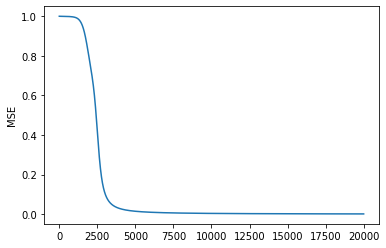

In [28]:
plt.plot(Graphique_MSE)
plt.ylabel('MSE')
plt.show()

## Prédictions

### Pour 20 000 epochs :

In [29]:
for i in range(0,4):
    print("Observation:"+str(valeurs_entrees_X[i])+ " - Attendu: "+str(valeurs_a_predire_Y[i])+" - Prediction: "+str(session.run(activation_couche_cachee, feed_dict={tf_neurones_entrees_X: [valeurs_entrees_X[i]]})))

Observation:[0.0, 0.0] - Attendu: [0.0] - Prediction: [[0.02206676]]
Observation:[0.0, 1.0] - Attendu: [1.0] - Prediction: [[0.9808779]]
Observation:[1.0, 0.0] - Attendu: [1.0] - Prediction: [[0.9808716]]
Observation:[1.0, 1.0] - Attendu: [0.0] - Prediction: [[0.01984922]]


### Pour 100 000 epochs :

In [17]:
for i in range(0,4):
    print("Observation:"+str(valeurs_entrees_X[i])+ " - Attendu: "+str(valeurs_a_predire_Y[i])+" - Prediction: "+str(session.run(activation_couche_cachee, feed_dict={tf_neurones_entrees_X: [valeurs_entrees_X[i]]})))

Observation:[0.0, 0.0] - Attendu: [0.0] - Prediction: [[0.00793759]]
Observation:[0.0, 1.0] - Attendu: [1.0] - Prediction: [[0.9909127]]
Observation:[1.0, 0.0] - Attendu: [1.0] - Prediction: [[0.99252206]]
Observation:[1.0, 1.0] - Attendu: [0.0] - Prediction: [[0.00709462]]


## Fermeture de la session tf

In [18]:
session.close()

---